<a href="https://colab.research.google.com/github/TeoGal/python-finance-readgroup/blob/main/chapter_3/chapter_3%20-%20updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 3

Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [ ]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

# Chapter 3 - Visualizing Financial Time Series

## 3.1 Basic visualization of time series data

### How to do it...

1. Import the libraries:

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

2. Download Microsoft's stock prices from 2020 and calculate simple returns:

In [ ]:
df = yf.download("MSFT",
                 start="2020-01-01",
                 end="2020-12-31",
                 auto_adjust = False,
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()  #percentage change from pervious data point to current one.
df = df.dropna()   #drop NANs in the data frame

3. Plot the adjusted close prices:

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_rtn
Date,,,,,,,
2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852280,21116200,-0.012452
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247360,20813700,0.002585
2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850037,21634100,-0.009118
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.268814,27746500,0.015929
2020-01-09,161.839996,162.220001,161.029999,162.089996,156.196075,21385000,0.012493


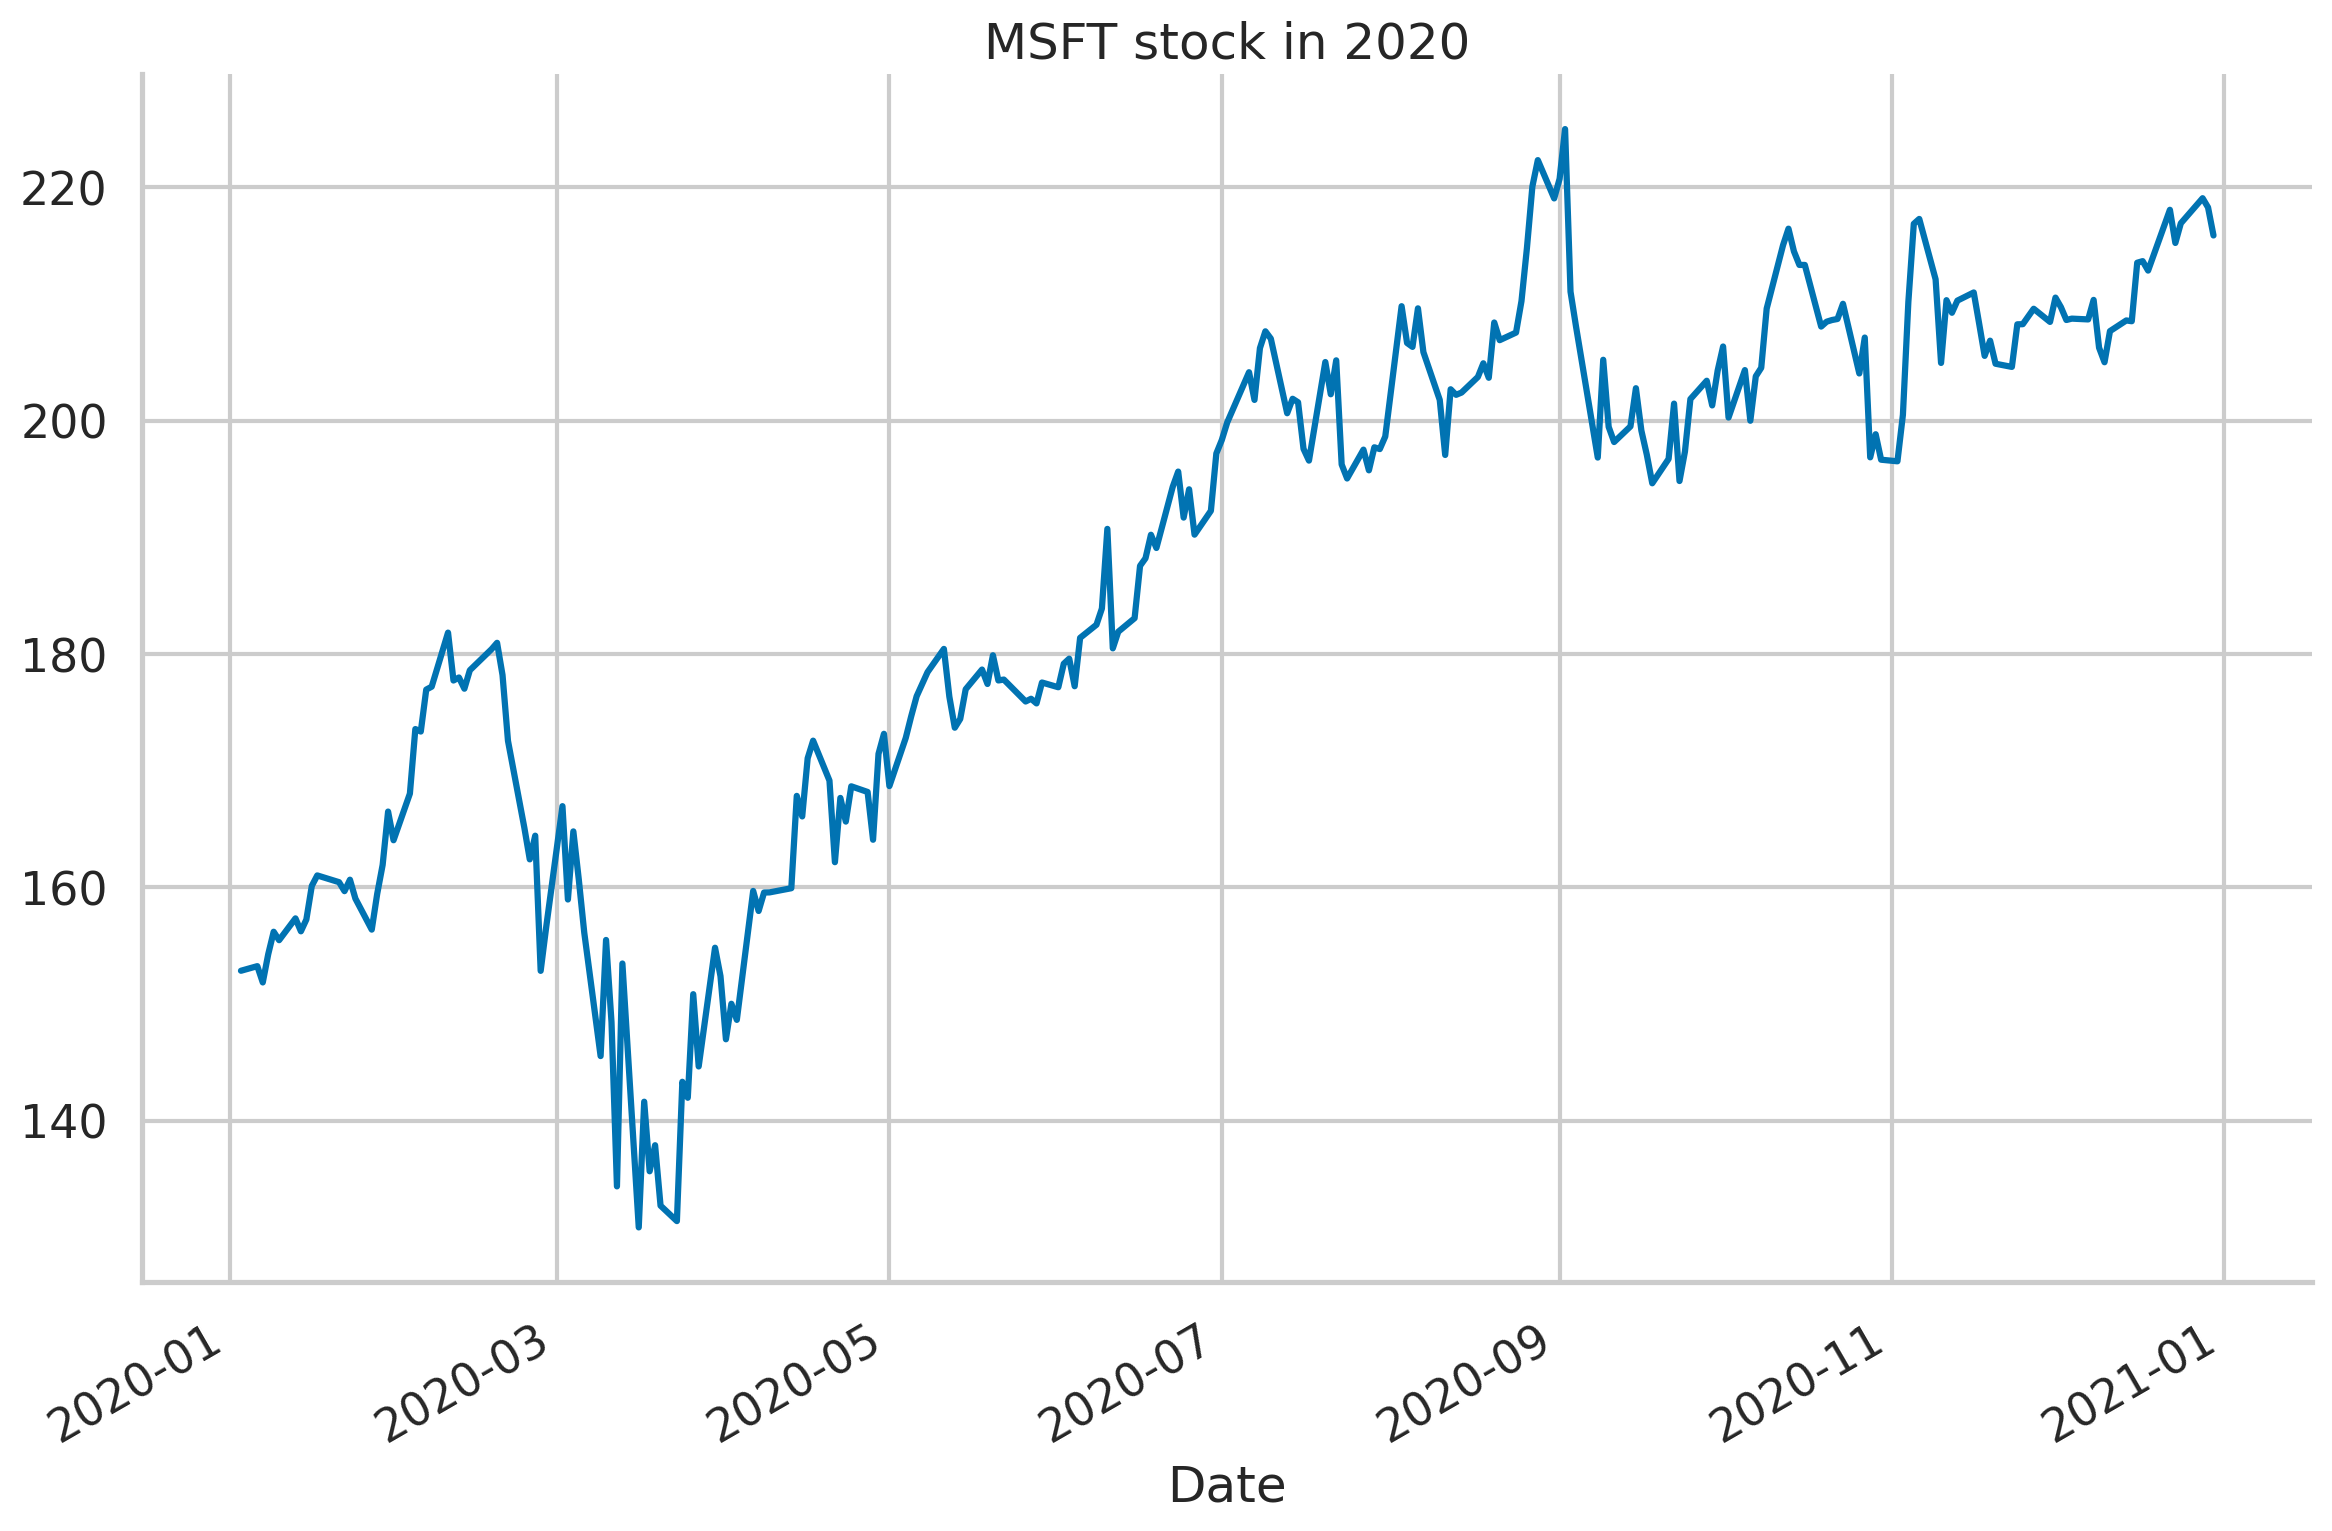

In [ ]:
df["Adj Close"].plot(title="MSFT stock in 2020");

sns.despine()

#The selected code `despine` is a call to the `despine()` function from the Seaborn library. This function is used to remove the top and right spines from a plot, resulting in a cleaner and more focused visualization. It helps in improving the aesthetics of the plot by removing unnecessary elements.
#removes the right and top borders of the plot

plt.tight_layout()
# plt.savefig('images/figure_3_1', dpi=200)
#The selected code `tight_layout` is a function that adjusts the subplots and the figure so that there are no overlapping items. It is used to improve the spacing between subplots and around the figure. When called without any arguments, it adjusts the subplot parameters so that the subplots fit into the figure area. This can be particularly useful when dealing with multiple subplots to ensure that the plot elements do not overlap and are clearly visible.


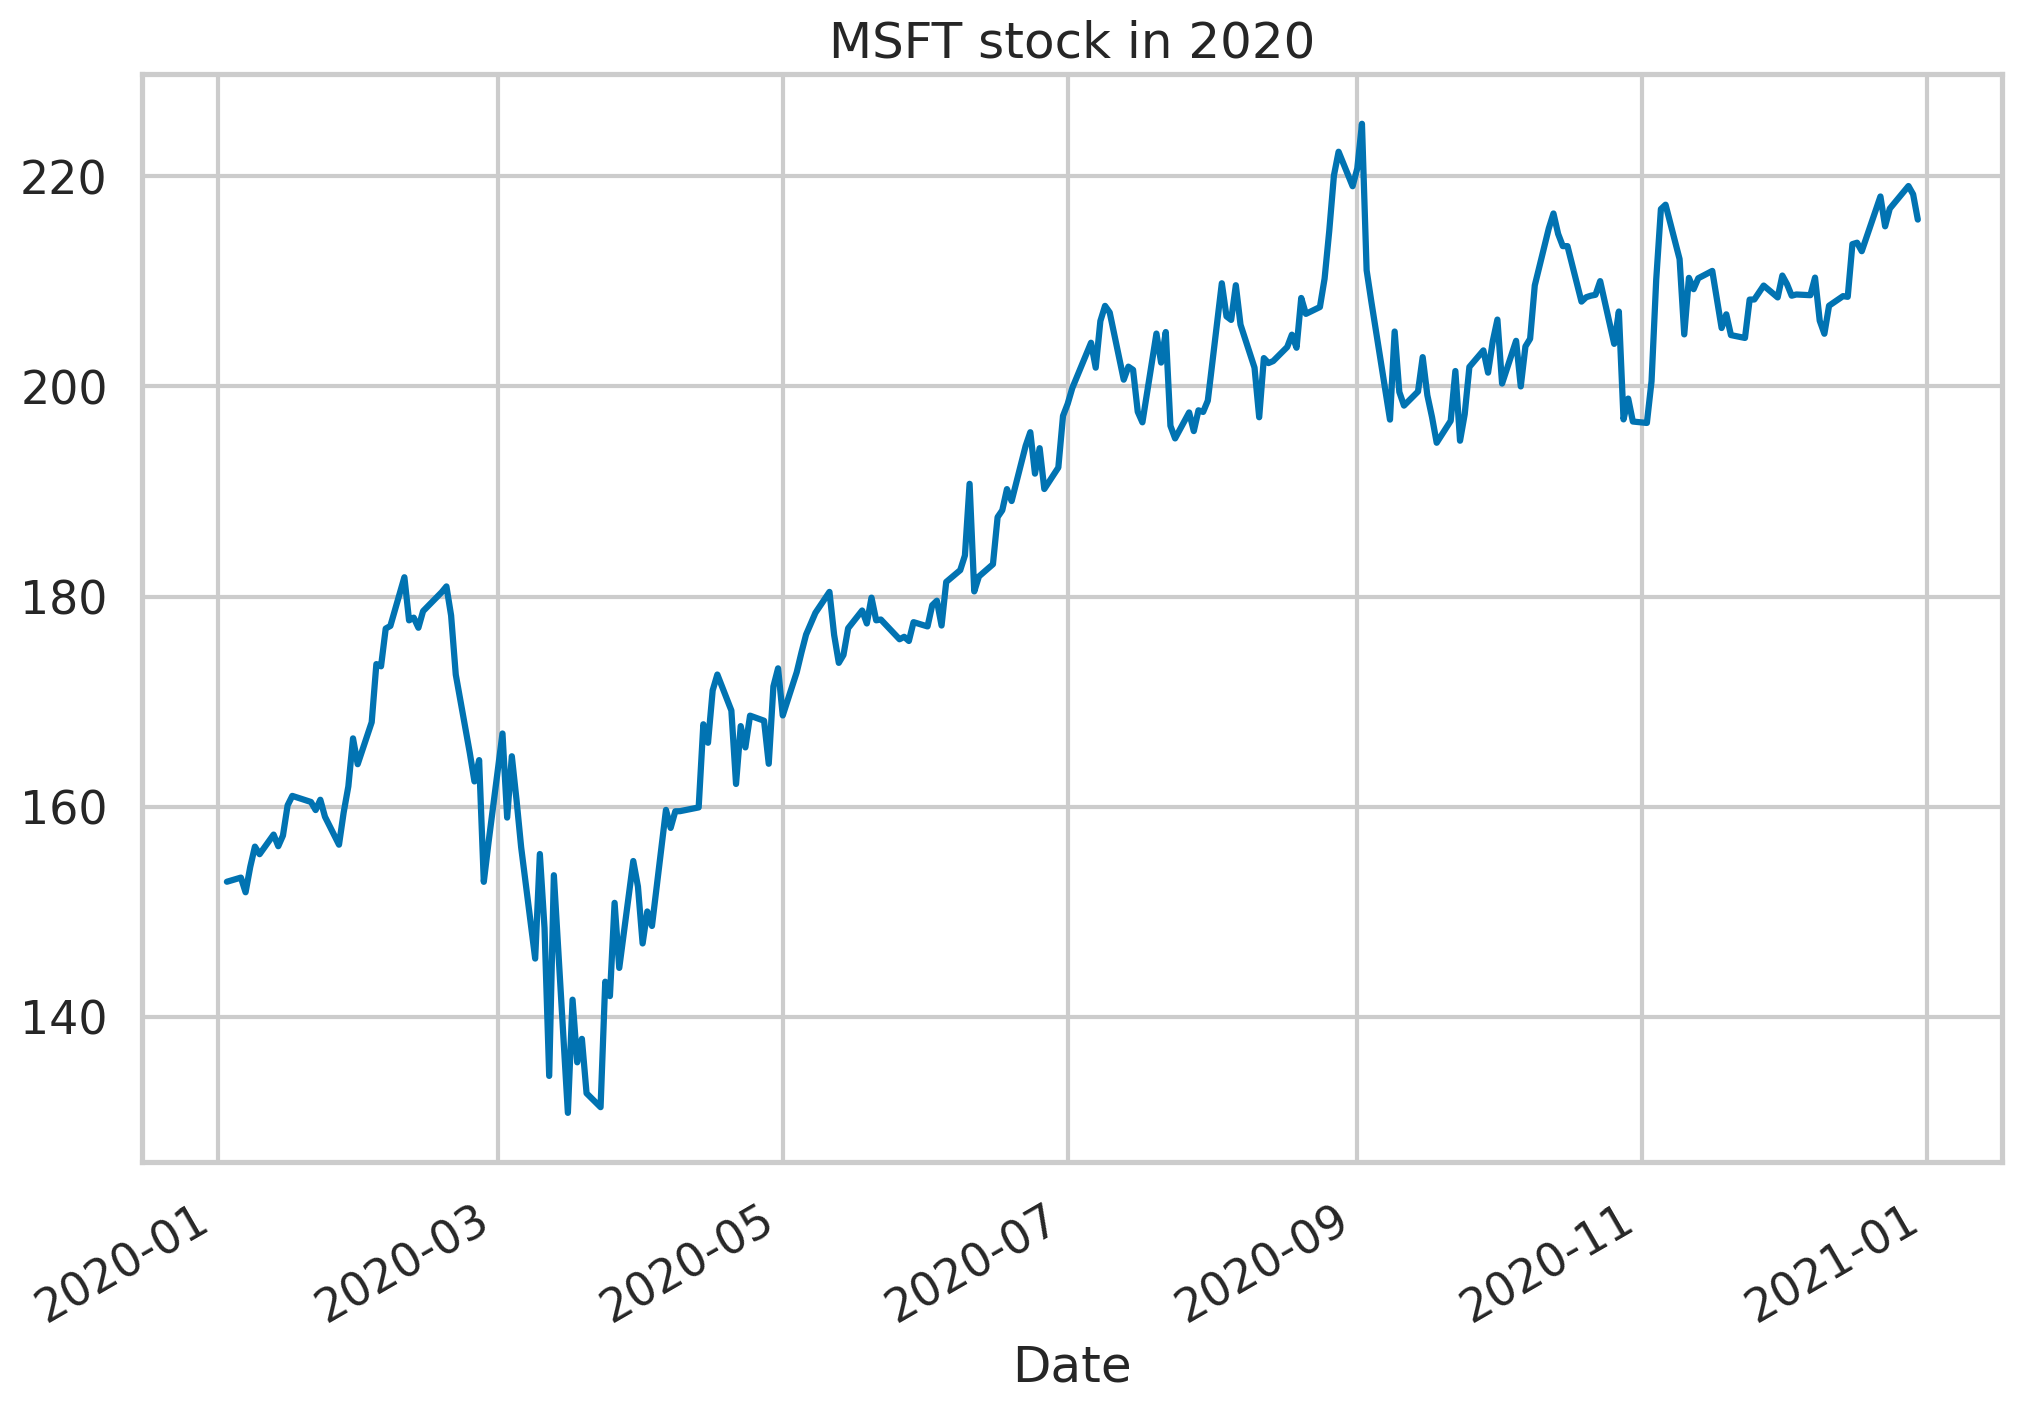

In [ ]:
df["Adj Close"].plot(title="MSFT stock in 2020");

It is the same as running the following:

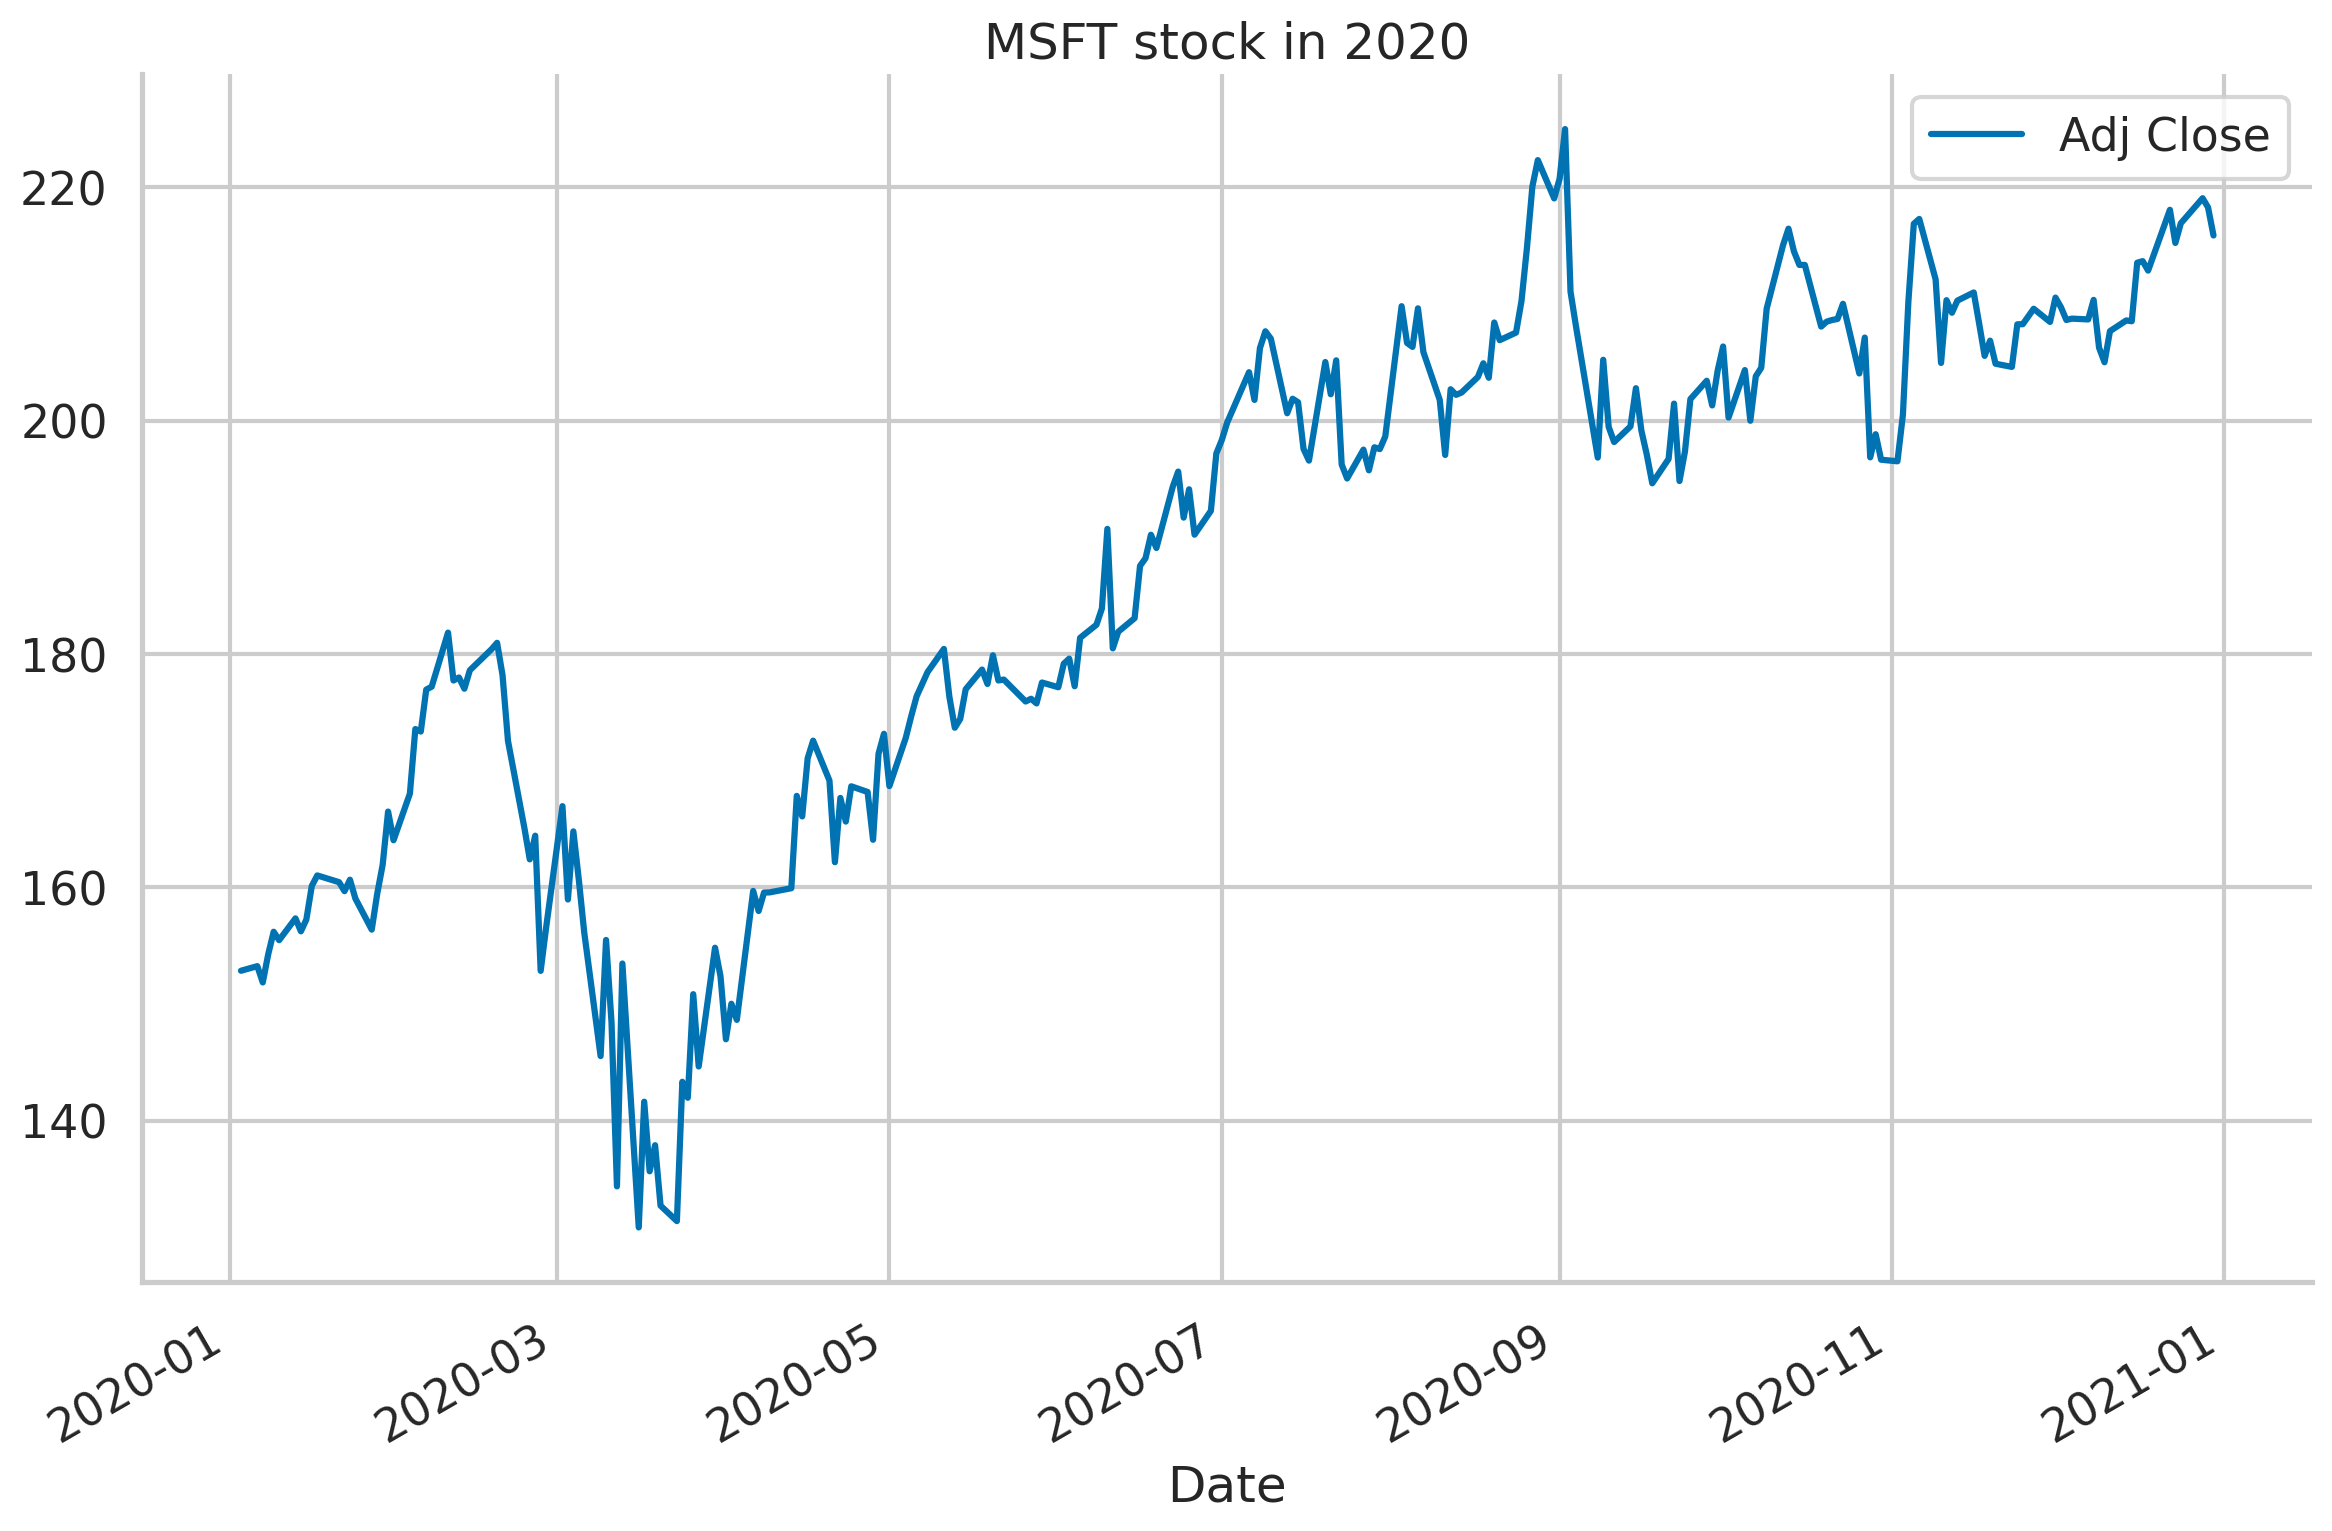

In [ ]:
df.plot.line(y="Adj Close", title="MSFT stock in 2020");

sns.despine()
plt.tight_layout()

4. Plot the adjusted close prices and simple returns in one plot:

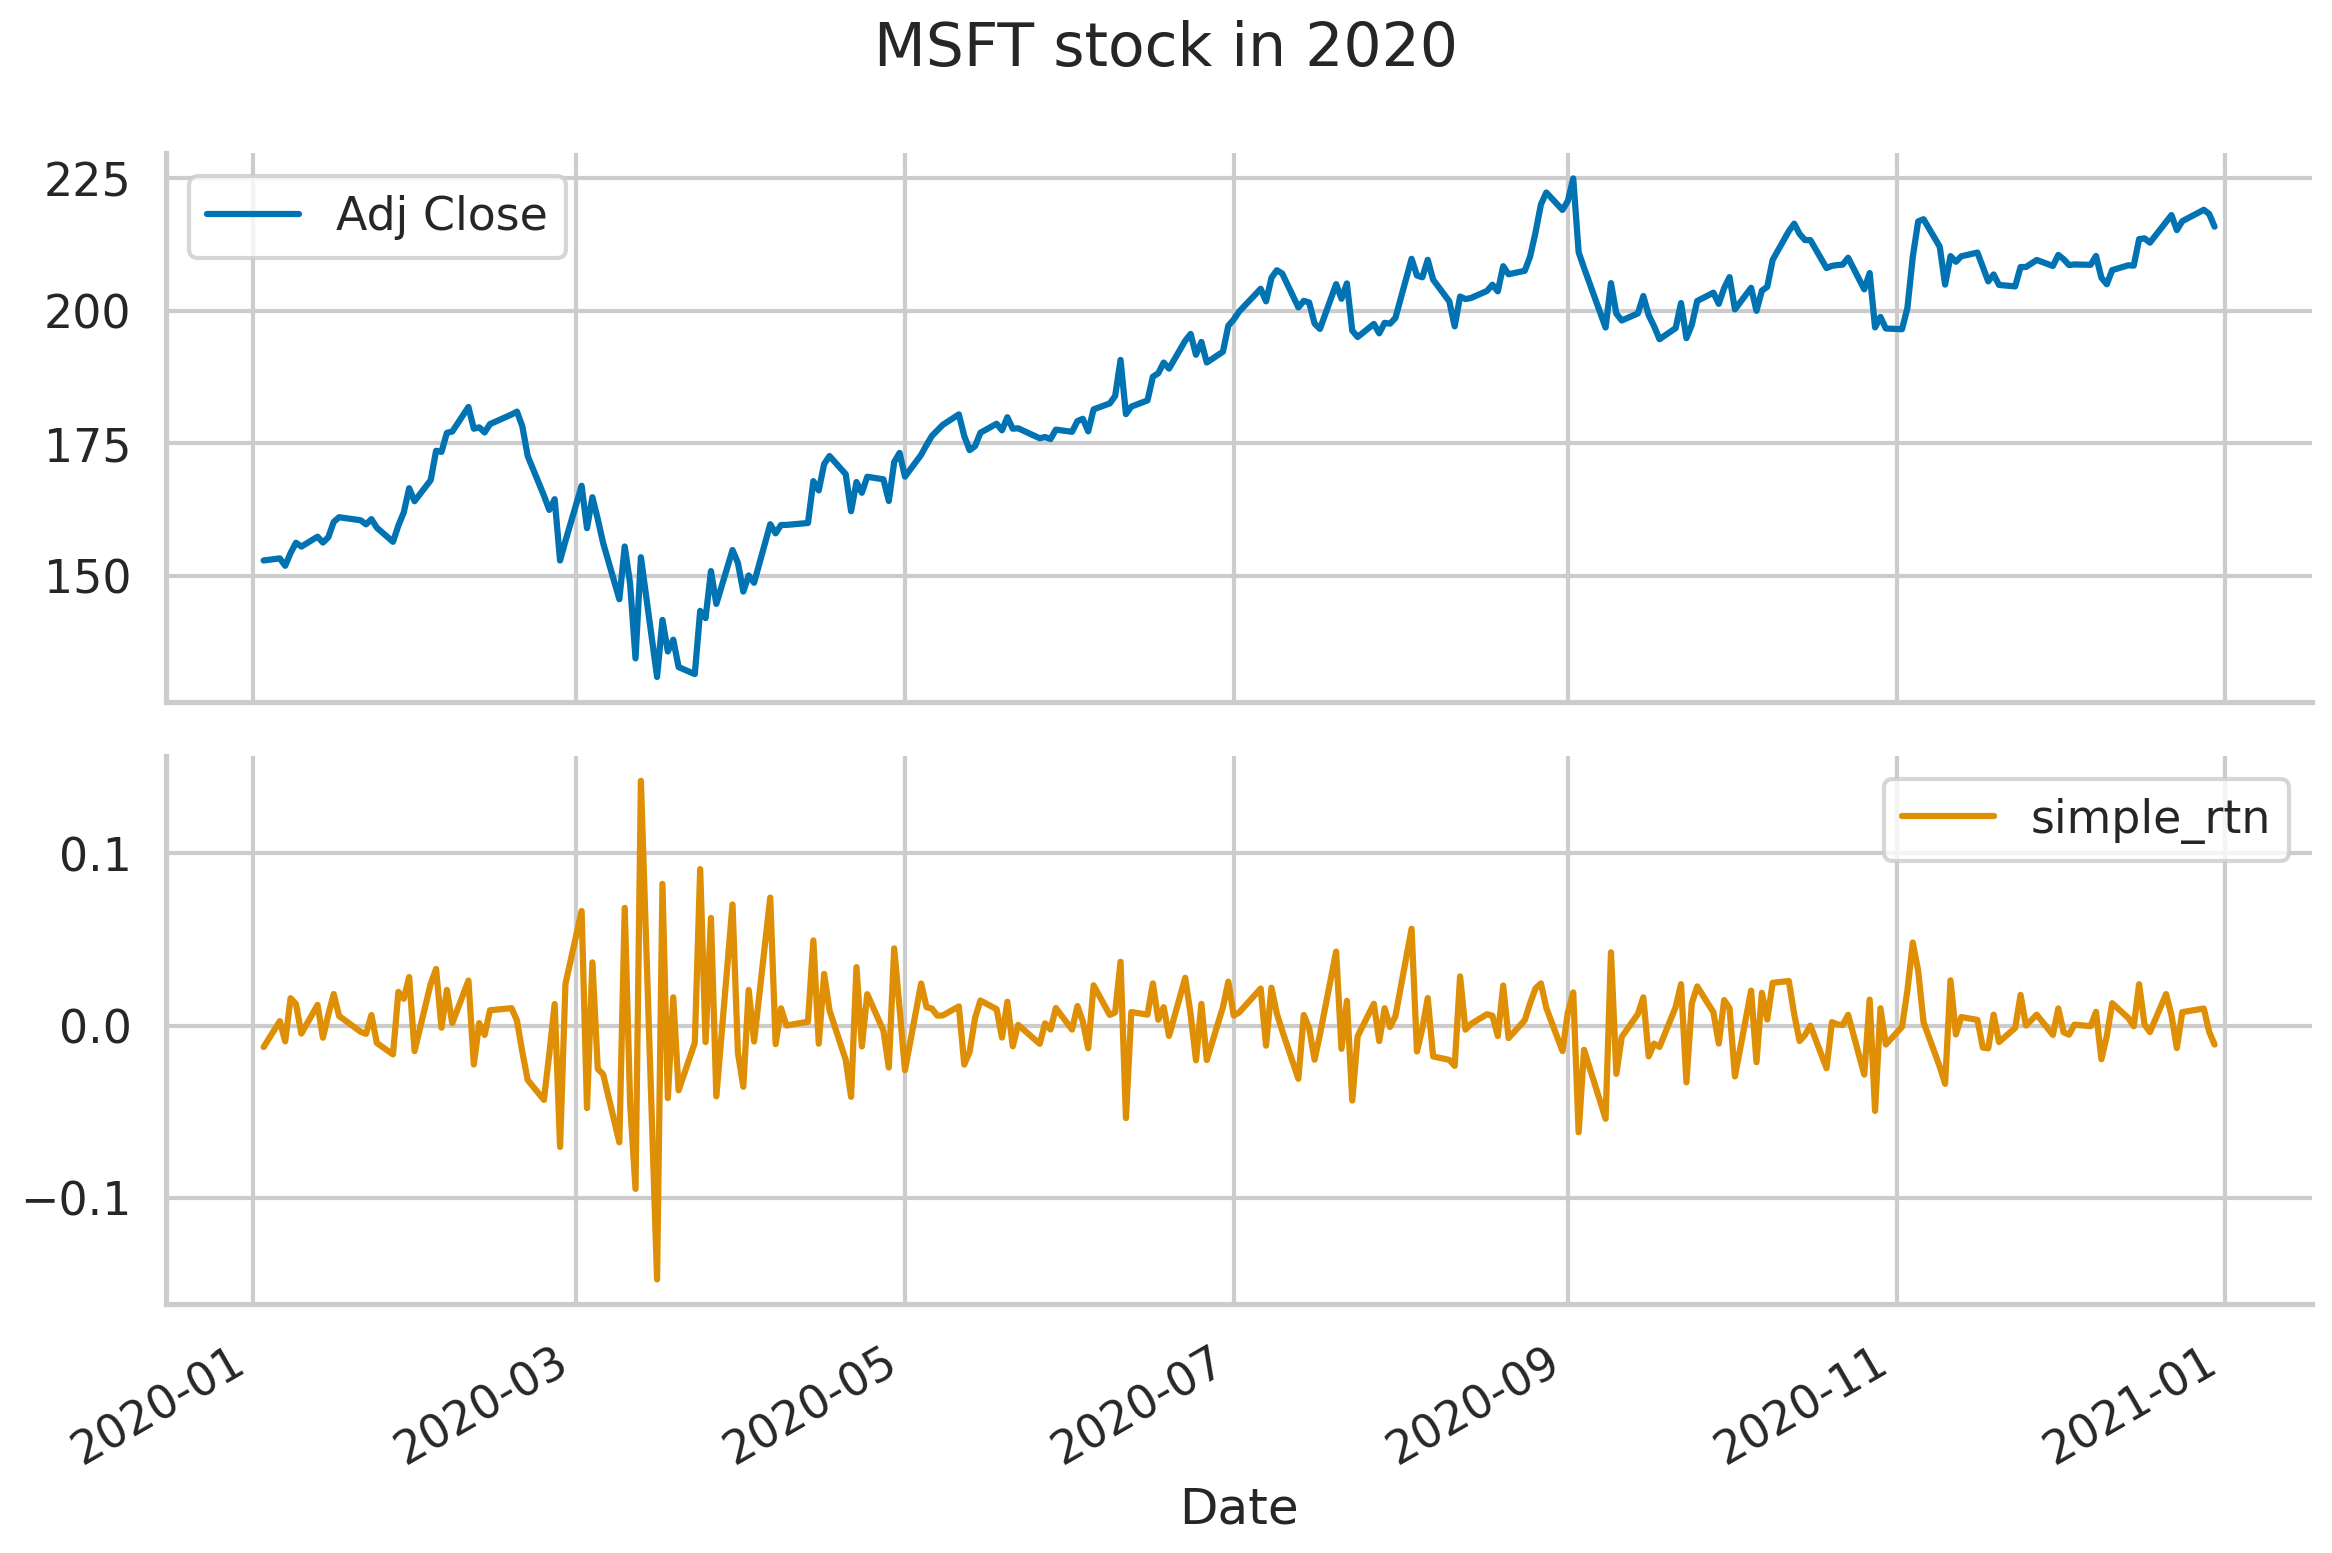

In [ ]:
(
    df[["Adj Close", "simple_rtn"]]
    .plot(subplots=True, sharex=True,
          title="MSFT stock in 2020")
);

#shareX is sharing the same x-axis.

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_2', dpi=200)

### There's more

1. Create a similar plot to the previous one using `matplotlib`'s object-oriented interface:

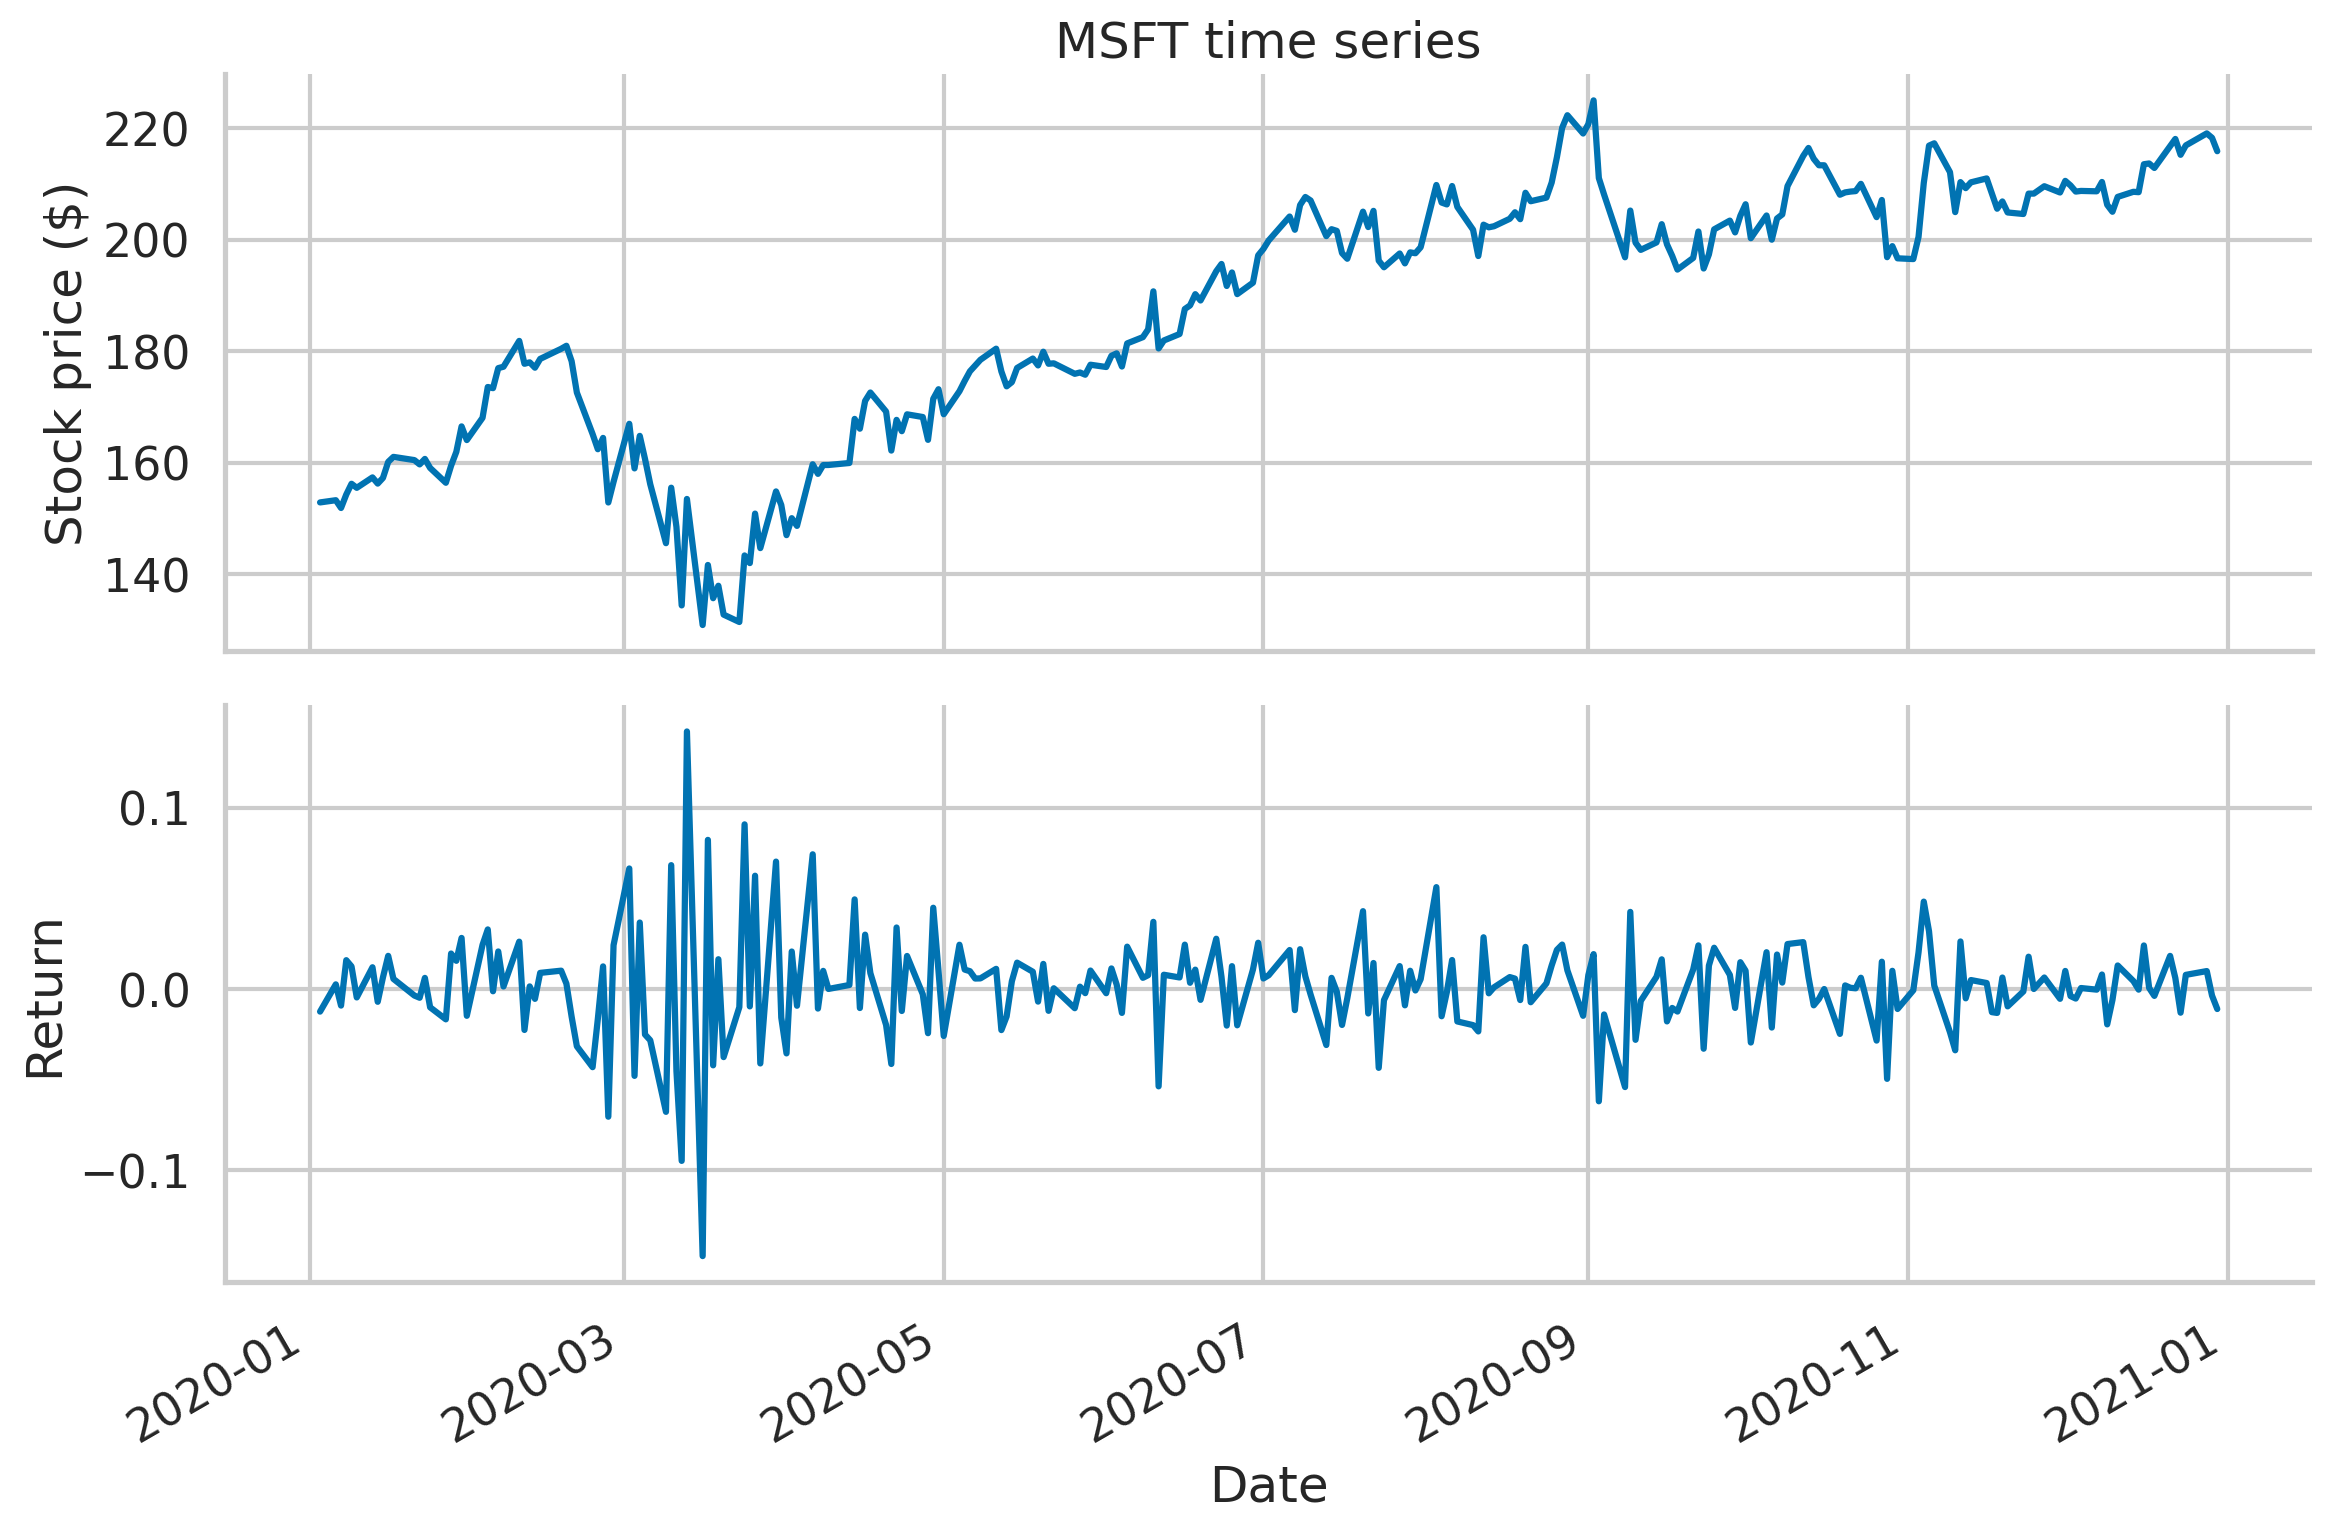

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)   #you can specify the number of plots in rows and columns

# add prices
df["Adj Close"].plot(ax=ax[0])
ax[0].set(title="MSFT time series",
          ylabel="Stock price ($)")

# add volume
df["simple_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Return")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_3', dpi=200)

2. Change the plotting backend of `pandas` to `plotly`:

In [ ]:
df["Adj Close"].plot(title="MSFT stock in 2020", backend="plotly")

#interactive plot. you can scroll around

#if this code didn't work, try installing 'pip install plotly_express==0.4.0'

In [ ]:
#import altair as alt

#alt.renderers.enable('html')

#df["Adj Close"].plot(backend="hvplot")

#df["Adj Close"].plot(title="MSFT stock in 2020", backend="hvplot")

#hvplot seems to do the same job, there is a problem with the altair backend

In [ ]:

df["Adj Close"].plot(title="MSFT stock in 2020", backend="holoviews")

ValueError: Could not find plotting backend 'holoviews'. Ensure that you've installed the package providing the 'holoviews' entrypoint, or that the package has a top-level `.plot` method.

## 3.2 Visualizing seasonal patterns

### How to do it...

1. Import the libraries and authenticate:

In [ ]:
import pandas as pd
import nasdaqdatalink
import seaborn as sns

nasdaqdatalink.ApiConfig.api_key = nasdaqdatalink_key

ModuleNotFoundError: No module named 'nasdaqdatalink'

2. Download and display unemployment data from Nasdaq Data Link:

In [ ]:
df = (
    nasdaqdatalink.get(dataset="FRED/UNRATENSA",
                       start_date="2014-01-01",
                       end_date="2019-12-31")
    .rename(columns={"Value": "unemp_rate"})
)
df.head()

In [ ]:
df.plot(title="Unemployment rate in years 2014-2019");
sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_6', dpi=200)

3. Create new columns with year and month:

In [ ]:
df["year"] = df.index.year
#The selected code `index.year` is used to access the year component of the index in a pandas DataFrame. This code assumes that the index of the DataFrame contains datetime objects. When used in the context of the provided 'active cell code', it would extract the year component from the index of the DataFrame `df`.

df["month"] = df.index.strftime("%b")
#The selected code `index.strftime` is used to format the datetime index of a DataFrame. The `strftime` method is used to convert the datetime index into a string with a specific format. In this case, the `%b` format is used to represent the month as an abbreviated name (e.g., Jan, Feb, Mar).

In [ ]:
df.head()

4. Create the seasonal plot:

In [ ]:
sns.lineplot(data=df,
             x="month",
             y="unemp_rate",
             hue="year",  #The `hue` parameter is used to define the variable that will determine the color of the lines in the line plot. In this case, the lines will be colored based on the unique values of the "year" column in the DataFrame `df`. Each unique value of "year" will be represented by a different color in the plot, making it easier to distinguish between different years' data.
             style="year",   #style` is a parameter used in the `sns.lineplot()` function from the Seaborn library. This parameter is used to specify the grouping variable that will produce lines with different styles.
             legend="full",
             palette="colorblind")

plt.title("Unemployment rate - Seasonal plot")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_7', dpi=200)

### There's more

1. Import the libraries:

In [ ]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import plotly.express as px

2. Create a month plot:

In [ ]:
month_plot(df["unemp_rate"], ylabel="Unemployment rate (%)")
plt.title("Unemployment rate - Month plot");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_8', dpi=200)

3. Create a quarter plot:

In [ ]:
quarter_plot(df["unemp_rate"].resample("Q").mean(),
             ylabel="Unemployment rate (%)")

#The selected code `resample("Q").mean()` is used to resample the time series data in the DataFrame. Here's a breakdown of the code:

#1. `resample("Q")` - This part of the code uses the `resample()` method to change the frequency of the time series data to quarterly frequency ("Q" stands for quarter).

#2. `mean()` - After resampling the data to quarterly frequency, the `mean()` method is applied to calculate the mean value for each quarter.

#So, this code takes the original time series data, changes its frequency to quarterly, and then calculates the mean value for each quarter.

plt.title("Unemployment rate - Quarter plot");

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_3_9', dpi=200)

4. Create a polar seasonal plot using `plotly.express`:

In [ ]:
fig = px.line_polar(
    df, r="unemp_rate", theta="month",
    color="year", line_close=True,
    title="Unemployment rate - Polar seasonal plot",
    width=600, height=500,
    range_r=[3, 7]
)
#im getting an error, because there is apparently some change in panda.append but dont know how to fix it within an exisisting package.


fig.show()

In [ ]:
df

## 3.3 Creating interactive visualizations

1. Import the libraries and initialize Notebook display:

In [ ]:
import pandas as pd
import yfinance as yf

import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas_bokeh

cf.go_offline()
# initialize notebook display
pandas_bokeh.output_notebook()

2. Download Microsoft's stock prices from 2020 and calculate simple returns:

In [ ]:
df = yf.download("MSFT",
                 start="2020-01-01",
                 end="2020-12-31",
                 auto_adjust = False,
                 progress=False)

df["simple_rtn"] = df["Adj Close"].pct_change()
df = df.loc[:, ["Adj Close", "simple_rtn"]].dropna()
df = df.dropna()

In [ ]:
df

3. Create the plot using `cufflinks`:

In [ ]:
df.iplot(subplots=True, shape=(2,1),
         shared_xaxes=True,
         title="MSFT time series")

4. Create the plot using `bokeh`:

In [ ]:
df["Adj Close"].plot_bokeh(kind="line",
                           rangetool=True,
                           title="MSFT time series");


5. Create the plot using `plotly.express`:

In [ ]:
fig = px.line(data_frame=df,
              y="Adj Close",
              title="MSFT time series")
fig.show()

### There's more

1. Import the libraries:

In [ ]:
from datetime import date

2. Define the annotations for the `plotly` plot:

In [ ]:
selected_date_1 = date(2020, 2, 19)
selected_date_2 = date(2020, 3, 23)

selected_y_1 = (
    df
    .query(f"index == '{selected_date_1}'")
    .loc[:, "Adj Close"]
    .squeeze()
)


#The selected code `query` is a method used to filter rows from a DataFrame based on a specified condition. In this context, it is used to filter the DataFrame `df` to select rows where the index matches the specified date.

#Here's a brief explanation of the selected code:

#- `query(f"index == '{selected_date_1}'")` - This line uses the `query` method to filter the DataFrame `df` based on the condition that the index (date) is equal to `selected_date_1`.


#The selected code `loc` is a method used to access a group of rows and columns by label(s) or a boolean array. It is commonly used to select a subset of rows and columns from a DataFrame based on the labels of the rows and/or columns.

selected_y_2 = (
    df
    .query(f"index == '{selected_date_2}'")
    .loc[:, "Adj Close"]
    .squeeze()
)

first_annotation = {
    "x": selected_date_1,
    "y": selected_y_1,
    "arrowhead": 5,
    "text": "COVID decline starting",
    "font": {"size": 15, "color": "red"},
}

second_annotation = {
    "x": selected_date_2,
    "y": selected_y_2,
    "arrowhead": 5,
    "text": "COVID recovery starting",
    "font": {"size": 15, "color": "green"},
    "ax": 150, #size of arrow
    "ay": 20
}

3. Update the layout of the plot and show it:

In [ ]:
fig.update_layout(
    {"annotations": [first_annotation, second_annotation]}
)
fig.show()

## 3.4 Creating a candlestick chart

### Getting ready

1. Import the libraries:

In [ ]:
import pandas as pd
import yfinance as yf

2. Download the adjusted prices from Yahoo Finance:

In [ ]:
df = yf.download("X",
                 start="2018-01-01",
                 end="2018-12-31",
                 progress=False,
                 auto_adjust=True)

In [ ]:
#df = yf.download("TWTR",
     #            start="2018-01-01",
      #           end="2018-12-31",
      #           progress=False,
      #           auto_adjust=True)
#for some reason, twitter data is changed. I changed it to X and it worked :)

In [ ]:
df

### How to do it...

1. Import the libraries:

In [ ]:
import cufflinks as cf
from plotly.offline import iplot

cf.go_offline()

As an alternative to running `cf.go_offline()` every time, we can also modify the settings to always use the offline mode by running: `cf.set_config_file(offline=True)`. We can then view the settings using `cf.get_config_file()`.

In [ ]:
cf.set_config_file(offline=False)

In [ ]:
cf.get_config_file()

2. Create the candlestick chart using Twitter's stock prices:

In [ ]:
qf = cf.QuantFig(
    df, title="Twitter's Stock Price",
    legend="top", name="Twitter's stock prices in 2018"
)

3. Add volume and moving averages to the figure:

In [ ]:
qf.add_volume()
qf.add_sma(periods=20, column="Close", color="red")
qf.add_ema(periods=20, color="green")

4. Display the plot:

In [ ]:
qf.iplot()

### There's more

1. Import the libraries:

In [ ]:
import plotly.graph_objects as go
import mplfinance as mpf

2. Create a candlestick chart using `plotly`:

In [ ]:
fig = go.Figure(data=
    go.Candlestick(x=df.index,
                   open=df["Open"],
                   high=df["High"],
                   low=df["Low"],
                   close=df["Close"])
)

fig.update_layout(
    title="Twitter's stock prices in 2018",
    yaxis_title="Price ($)"
)

fig.show()

3. Create a candlestick chart using `mplfinance`:

In [ ]:
mpf.plot(df, type="candle",
         mav=(10, 20),
         volume=True,
         style="yahoo",
         title="Twitter's stock prices in 2018",
         figsize=(8, 4));

sns.despine()
plt.tight_layout()